In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

### PARTE 1

Ejercicio 1 : Transformacion de Coordenadas Cromaticas

Es una tranaformada que se aplicac a imagenes de color para eliminar los cambios de contraste.

La funcion "Fun_CoorCromatic" tiene como entrada un string que es el nombre de la ruta. El proceso interno es el siguiente:
1. Lee la imagen con la ruta proporcionada
2. Se normaliza el rango dinamico a 0-1
3. Se copia la matriz original para que al final devolver la original y la transformada
4. Se aplica la transformada y se cambia los valores "nan" con 0
5. Se transforma al rango dinamico de 0 a 255

In [79]:
def Fun_CoorCromatic(ruta):
    img = cv2.imread(ruta)
    img = cv2.normalize(img,None, 0,1.0,cv2.NORM_MINMAX,dtype=cv2.CV_32F)

    img_new = img.copy()

    print("Tamaño:", img.shape)

    img_new[:,:,0] = np.round((img[:,:,0]/(img[:,:,0]+img[:,:,1]+img[:,:,2]))*255)
    img_new[:,:,1] = np.round((img[:,:,1]/(img[:,:,0]+img[:,:,1]+img[:,:,2]))*255)
    img_new[:,:,2] = np.round((img[:,:,2]/(img[:,:,0]+img[:,:,1]+img[:,:,2]))*255)


    np.nan_to_num(img_new[:,:,0],0)
    np.nan_to_num(img_new[:,:,1],0)
    np.nan_to_num(img_new[:,:,2],0) 

    img_new = img_new.astype(np.uint8)

    return img,img_new

    

In [80]:
# Se lista los nombres de los archivos que existen dentro de "coord_cromaticas"
os.listdir('materiales\\coord_cromaticas')

['CoordCrom_3.png', 'CoordCrom_2.png', 'CoordCrom_1.png']

Se aplica la funcion creada y se visuliza el resultado

Tamaño: (996, 908, 3)


C:\Users\PC-01\AppData\Local\Temp\ipykernel_22252\381279705.py:9: RuntimeWarning: invalid value encountered in divide
  img_new[:,:,0] = np.round((img[:,:,0]/(img[:,:,0]+img[:,:,1]+img[:,:,2]))*255)
C:\Users\PC-01\AppData\Local\Temp\ipykernel_22252\381279705.py:10: RuntimeWarning: invalid value encountered in divide
  img_new[:,:,1] = np.round((img[:,:,1]/(img[:,:,0]+img[:,:,1]+img[:,:,2]))*255)
C:\Users\PC-01\AppData\Local\Temp\ipykernel_22252\381279705.py:11: RuntimeWarning: invalid value encountered in divide
  img_new[:,:,2] = np.round((img[:,:,2]/(img[:,:,0]+img[:,:,1]+img[:,:,2]))*255)


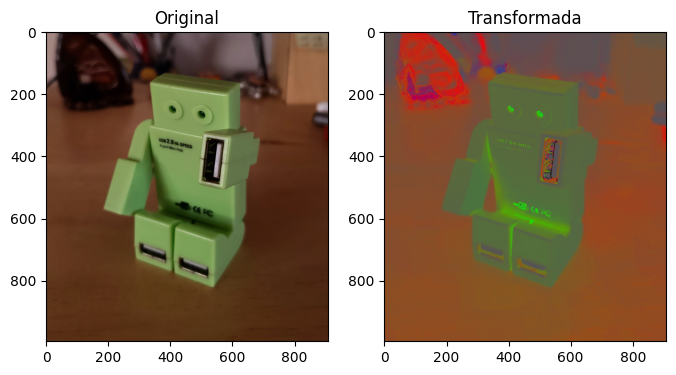

In [81]:

img, img_new = Fun_CoorCromatic('materiales\\coord_cromaticas\\CoordCrom_2.png')

plt.figure(figsize=(8,12))
plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
plt.title('Transformada')
plt.show()

La funcion "Fun_WhitePatch" tiene como entrada un string que es el nombre de la ruta. El proceso interno es el siguiente:
1. Lee la imagen con la ruta proporcionada
2. Se normaliza el rango dinamico a 0-1
3. Se copia la matriz original para que al final devolver la original y la transformada
4. Se separa cada canal BGR y se aplica la transformada
5. Se transforma al rango dinamico de 0 a 255

In [109]:
def Fun_WhitePatch(ruta):

    img = cv2.imread(ruta)
    img = cv2.normalize(img,None, 0,1.0,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
    
    img_new = img.copy()

    B_max = np.max(img[:,:,0])
    G_max = np.max(img[:,:,1])
    R_max = np.max(img[:,:,2])

    img_new[:,:,0] = np.round((255/B_max)*img[:,:,0])
    img_new[:,:,1] = np.round((255/G_max)*img[:,:,1])
    img_new[:,:,2] = np.round((255/R_max)*img[:,:,2])

    img_new = img_new.astype(np.uint8)

    return img,img_new

In [92]:
os.listdir('materiales/white_patch')

['test_red.png',
 'wp_blue.jpg',
 'wp_green.png',
 'test_blue.png',
 'wp_red.png',
 'wp_red2.jpg',
 'wp_green2.jpg',
 'test_green.png']

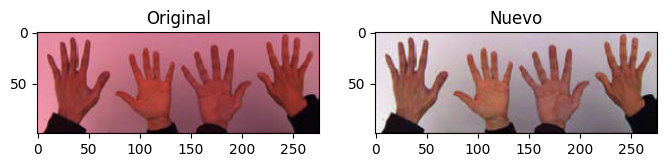

In [110]:
img, img_new = Fun_WhitePatch('materiales\\white_patch\\test_red.png')

plt.figure(figsize=(8,12))
plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
plt.title('Nuevo')
plt.show()


### Parte 2

Ejercicio 1: Imagen en escala de grises

Las imagenes de color tienen 3 componentes (R,G y B), estos pueden ser transformados a una sola componente que representa una imagen en escala de grises. Existen diferentes formulas de conversion, pero opencv utilizan el formato CCIR 601.

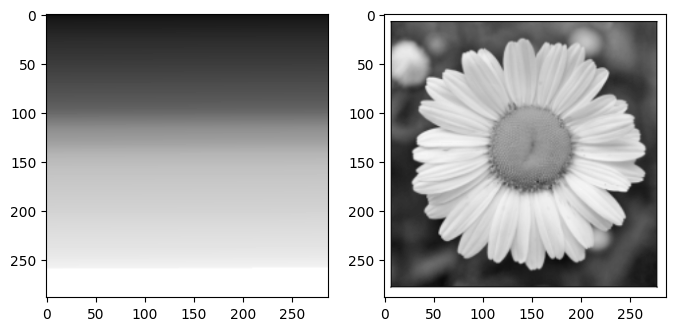

In [53]:
# La funcion imread de opencv es posible agregar un paramaetro para conversion a escala de grises
img1_tp = cv2.imread('materiales/img1_tp.png',cv2.IMREAD_GRAYSCALE)
img2_tp = cv2.imread('materiales/img2_tp.png',cv2.IMREAD_GRAYSCALE)

# se debe agregar el parametro 'gray' al mapa de color para poder visualizarlo correctamente
plt.figure(figsize=(8,4))
plt.subplot(1,2,1),plt.imshow(img1_tp,cmap='gray')
plt.subplot(1,2,2),plt.imshow(img2_tp,cmap='gray')
plt.show()

Ejercicio 2: Histograma de imagen en escala de grises

El histograma permite observar la cantidad de pixeles por cada valor del rango dinamico. En opencv existe una funcion "calcHist" que calcula el histograma de una imagen.

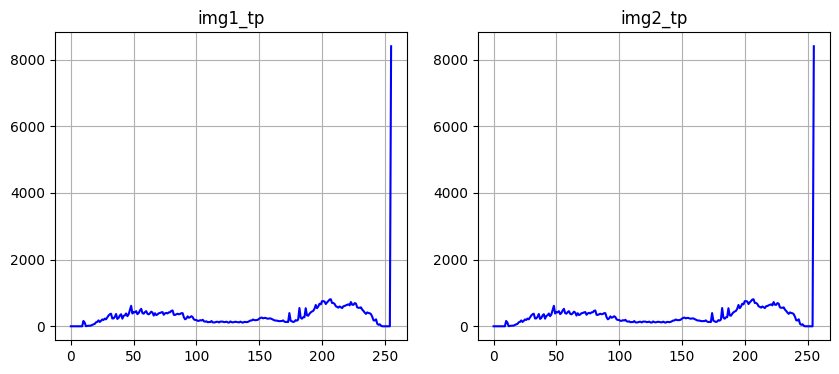

In [59]:

hist_t1 = cv2.calcHist([img1_tp],[0],None,[256],[0,256])
hist_t2 = cv2.calcHist([img2_tp],[0],None,[256],[0,256])


plt.figure(figsize=(10,4))
plt.subplot(1,2,1),plt.plot(hist_t1, color='b'),plt.grid()
plt.title('img1_tp')
plt.subplot(1,2,2),plt.plot(hist_t2, color='b'),plt.grid()
plt.title('img2_tp')

plt.show()

En esta linea se comprueba que las posiciones de la intensidad en cada iamgen son diferentes.

In [39]:
print('Posiciones de intesidad 10 en imagen 1: ')
print(np.where(img1_tp.ravel()==10))
print('Posiciones de intesidad 10 en imagen 2: ')
print(np.where(img2_tp.ravel()==10))

Posiciones de intesidad 10 en imagen 1: 
(array([  4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162], dtype=int64),)
Posiciones de intesidad 10 en imagen 2: 
(array([2017, 2

Ejercicio 3 : Segmentacion

La segmentacion en una imagen es la seleccion y separacion de una region de interes.
Para el ejercicio 3, primero se realiza un analis mediante los siguientes pasos:

1. Lectura de la imagen a segmentar
2. Definir las coordenadas de las regiones que se va a segmentar
3. Se recorta y se calcula el histograma en los 3 canales

REGION RECORTADA DE  CIELO


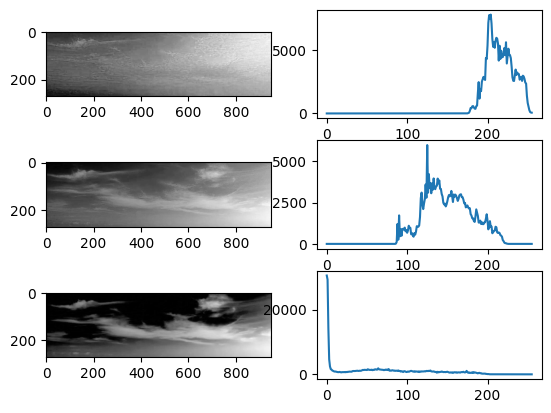

REGION RECORTADA DE  AGUA


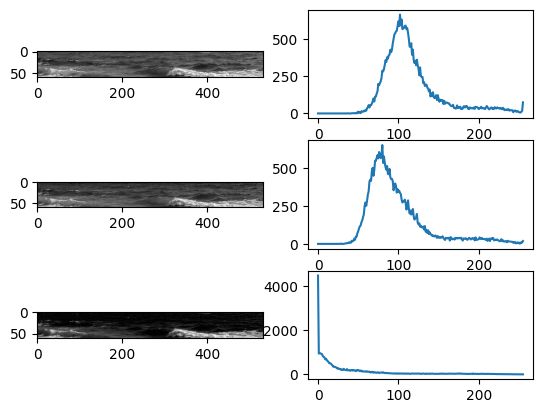

REGION RECORTADA DE  TIERRA


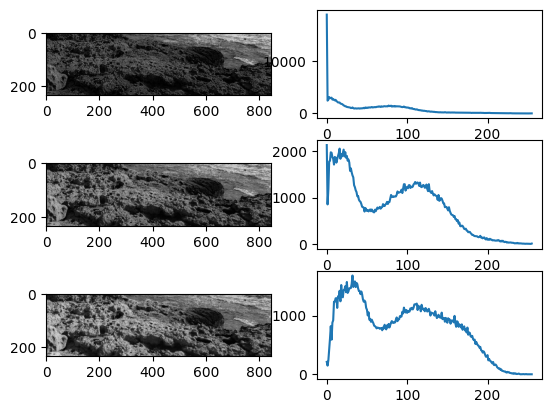

In [87]:
img_segm = cv2.imread('materiales/segmentacion.png')

# Analisis RGB
cotas = [(0,270,0,950),(290,350,419,950),(388,622,0,847)]
regiones = ['CIELO','AGUA','TIERRA']

for j in range(3):
    print("REGION RECORTADA DE ",regiones[j])
    plt.figure()
    for i in range(img_segm.shape[2]):
        region = img_segm[cotas[j][0]:cotas[j][1],cotas[j][2]:cotas[j][3],i]

        plt.subplot(3,2,2*i+1)
        plt.imshow(region,cmap='gray')
        plt.subplot(3,2,2*i+2)
        plt.plot(cv2.calcHist([region],[0],None,[256],[0,256]))
    
    plt.show()
    

En base al análisis realizado, se obtiene rangos de intensidad que sirve para umbralizar y segmentar las regiones de "cielo","tierra" y "agua". Las etapas para la segmentación son las siguientes:

1. Se especifica el rango que diferencia a la región "cielo"
2. Se selecciona la region mediante la funcion inRange
3. Se invierte el valor con la region seleccionada(mascara)
4. Se aplica la operacion AND entre la mascara y la imagen original

5. Se resta la region segmentada de "cielo" para que quede solo intensidades que representen a "tierra" y "agua".

6. El proceso se repite para las demas regiones de "tierra" y "agua".

Text(0.5, 1.0, 'Segmentación Agua')

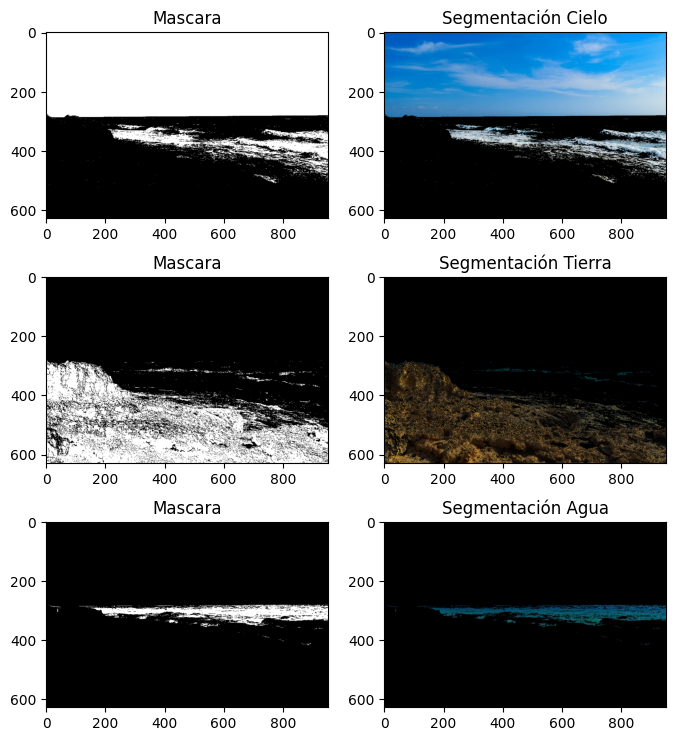

In [63]:
# Segmentar CIELO
rango1 = (0,0,0)
rango2 = (160,255,255)

mask = cv2.inRange(img_segm, rango1, rango2)
mask1 = cv2.bitwise_not(mask)
target = cv2.bitwise_and(img_segm,img_segm,mask=mask1)

plt.figure(figsize=(8,9))
plt.subplot(3,2,1),plt.imshow(mask1,cmap='gray')
plt.title('Mascara')
plt.subplot(3,2,2),plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.title('Segmentación Cielo')

# separar cielo de tierra y agua
img_sep = cv2.bitwise_and(img_segm, img_segm, mask=mask )

# Segmentar TIERRA
rango1 = (0,5,1)
rango2 = (80,220,220)
mask2 = cv2.inRange(img_sep,rango1,rango2)
img_sep2 = cv2.bitwise_and(img_segm,img_segm,mask=mask2)

plt.subplot(3,2,3),plt.imshow(mask2,cmap='gray')
plt.title('Mascara')
plt.subplot(3,2,4),plt.imshow(cv2.cvtColor(img_sep2, cv2.COLOR_BGR2RGB))
plt.title('Segmentación Tierra')


# Segmentar AGUA
mask3 = cv2.bitwise_xor(mask,mask2)
img_sep3 = cv2.bitwise_and(img_segm,img_segm,mask=mask3)
rango1 = (2,60,0)
rango2 = (255,170,40)
mask4 = cv2.inRange(img_sep3,rango1,rango2)
img_mar = cv2.bitwise_and(img_segm,img_segm,mask=mask4)



plt.subplot(3,2,5),plt.imshow(mask4,cmap='gray')
plt.title('Mascara')
plt.subplot(3,2,6),plt.imshow(cv2.cvtColor(img_mar, cv2.COLOR_BGR2RGB))
plt.title('Segmentación Agua')

Conclusiones:

Parte 1
- En la funcion de coordenadas cromaticas se debe tener en cuenta que las divisines indeterminadas se deben corregir agregando 0.

Parte 2
- Ejercicio 2 : Las 2 imágenes son diferentes pero con igual histograma, esto se debe a que la cantidad de las intensidades de cada pixel son iguales pero con diferente ubicación. No consideraria utilizar los histogramas como "fectures" para entrena un modelo de clasificacion.

- Ejercicio 3 : En la segmentacion utiolizada los umbrales son fijos, lo cual ante un cambio de iluminacion no se podria generalizar a otras imagenes.